Binôme: Reda Chaguer, Sohaib Errabii

# IF240 - Apprentissage et deep learning

## Practice 3: SVM 

By Aurélie Bugeau
Credits:  Vincent Lepetit

### Objectives 
The objective of the practice is to apply SVM with different kernels. You will use the two following 2 moons and 2 circles datasets.

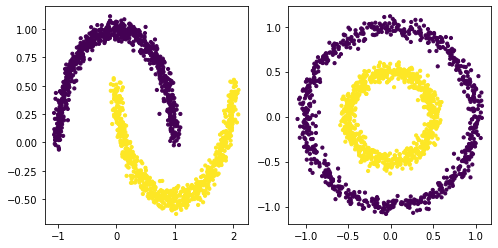

In [507]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons, make_circles

X_moons, y_moons = make_moons(n_samples=1500, noise=0.05, random_state=0)
X_circles, y_circles = make_circles(n_samples=1500, factor=0.5, noise=0.05, random_state=0)

plt.figure(figsize=(8, 4))
plt.subplot(121); plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=10, cmap='viridis')
plt.subplot(122); plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, s=10, cmap='viridis')

### Question 1
Explain what the variables `X_moons`, `y_moons`, `X_circles` and `y_circles` contain exactly

`X_moons`, `X_circles` are matrices of dimension `N x 2`, where `N` is the number of samples and `X[i,0], X[i,1]` are the `x`, `y` coordinates of the ith sample.

`y_moons`, `y_circles` are arrays of length `N` containing the labels, i.e. If `y[i] = 0`(resp. `y[i] = 1`) then the ith sample belongs to class 0 (resp. class 1).



Separate the data into training and test data with:

In [508]:
indices = np.random.permutation(len(X_moons))
X_moons_train = X_moons[indices[:-40]]
y_moons_train = y_moons[indices[:-40]]
X_moons_valid = X_moons[indices[-40:-20]]
y_moons_valid = y_moons[indices[-40:-20]]
X_moons_test  = X_moons[indices[-20:]]
y_moons_test  = y_moons[indices[-20:]]

In [509]:
X_circles_train = X_circles[indices[:-40]]
y_circles_train = y_circles[indices[:-40]]
X_circles_valid = X_circles[indices[-40:-20]]
y_circles_valid = y_circles[indices[-40:-20]]
X_circles_test  = X_circles[indices[-20:]]
y_circles_test  = y_circles[indices[-20:]]

## Linear SVM
### Question 2
Apply linear SVM to these data and print the accuracy on the test datasets.

In [510]:
from sklearn import svm

svc_moons = svm.SVC(kernel='linear')
svc_moons.fit(X_moons_train, y_moons_train)
acc_moons = svc_moons.score(X_moons_test, y_moons_test)


svc_circles = svm.SVC(kernel='linear')
svc_circles.fit(X_circles_train, y_circles_train)
acc_circles = svc_circles.score(X_circles_test, y_circles_test)

print("Moons Accuracy :"+str(acc_moons))
print("Circles Accuracy :"+str(acc_circles))


Moons Accuracy :0.95
Circles Accuracy :0.45


### Question 3
Check the documentation at http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC to see how to change the parameter $C$, the weight between the classification score and the regularization term.

Use the validation sets to identify the optimal value for $C$ and print the value of the corresponding on the test set.

In [511]:
acc_moons_set = {}
acc_circles_set = {}

C_set = [10**exp for exp in range(-3, 3)]

for C_val in C_set:
    svc_moons.set_params(**{'C':C_val})
    svc_moons.fit(X_moons_train, y_moons_train)

    svc_circles.set_params(**{'C':C_val})
    svc_circles.fit(X_circles_train, y_circles_train)
    
    acc_moons_set[C_val] = svc_moons.score(X_moons_valid, y_moons_valid)
    acc_circles_set[C_val] = svc_circles.score(X_circles_valid, y_circles_valid)
    
    print("C value = "+str(C_val)+ ":")
    print("\tMoons : "+str(acc_moons_set[C_val]))
    print("\tCircles : "+str(acc_circles_set[C_val])+"\n")

C value = 0.001:
	Moons : 0.85
	Circles : 0.55

C value = 0.01:
	Moons : 0.85
	Circles : 0.55

C value = 0.1:
	Moons : 0.9
	Circles : 0.55

C value = 1:
	Moons : 0.9
	Circles : 0.6

C value = 10:
	Moons : 0.9
	Circles : 0.6

C value = 100:
	Moons : 0.9
	Circles : 0.6



### Question 4
Let us visualize the result. For visualizing in 2D  the effect of an SVM classifier, you are given the following functions

In [512]:
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

The visualization functions can be used in the following way. Classification of every point on the meshgrid is made. Explain the result

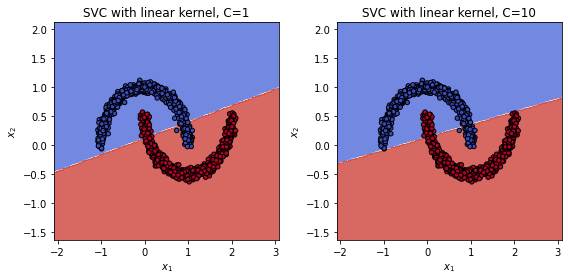

In [554]:
X_test = X_moons_train
y_test = y_moons_train

models = (svm.SVC(kernel='linear', C=0.1),
          svm.SVC(kernel='linear', C=100))
models = (clf.fit(X_test, y_test) for clf in models)

# title for the plots
titles = ('SVC with linear kernel, C=1',
          'SVC with linear kernel, C=10')

# Set-up 1x2 grid for plotting.
fig, sub = plt.subplots(1, 2, figsize=(8, 4))

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

for i, (clf, title) in enumerate(zip(models, titles)):
    ax = plt.subplot(1, 2, i+1)
    plot_contours(ax, clf, xx, yy, cmap='coolwarm', alpha=0.8)
    plt.scatter(X0, X1, c=y_test, cmap='coolwarm', s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)

plt.tight_layout()

**The half moons are not linearly separable** so it was expected for the linear SVM classifier to fail at separating the data.

On the other hand, we notice that the decision boundary in the first case (C = 1) there is still a very small distance between the boundary and the points (right side for the red points and left side for blue points). Whereas, in the second case (C = 10) the boundary is tangent to the points at the right and left sides. 
This can be explained by the fact that a **large C tends to overfit the training data** while a **small C tends to emphasize the margin**, ignoring the outliers in the training data.

## Non-Linear SVM

You can now create a non-linear support vector machine classifier with Gaussian kernels. See if you can tune $C$ and $\gamma$, the standard deviation of the kernels to improve the classification results on the two datasets.

Print the classification results (accuracy) and plot the datasets with the decision boundaries.

Next, you can experiment with the polynomial kernel.

In [553]:
from itertools import product as prd
opt_moons_params = opt_circles_params = []
max_acc_moons = max_acc_circles = 0

C_set = [10**exp for exp in range(-3, 3)]
svm_params = [C_set, ['rbf', 'poly'], ['auto', 'scale']]

In [552]:
for C_val, k_type, g_type in prd(*svm_params):
    svc_moons.set_params(**{'C':C_val, 'kernel':k_type, 'gamma': g_type})
    svc_moons.fit(X_moons_train, y_moons_train)

    svc_circles.set_params(**{'C':C_val, 'kernel':k_type, 'gamma': g_type})
    svc_circles.fit(X_circles_train, y_circles_train)
    
    curr_moons_acc = svc_moons.score(X_moons_valid, y_moons_valid)
    curr_circles_acc = svc_circles.score(X_circles_valid, y_circles_valid)
    
    if (curr_moons_acc > max_acc_moons):
        max_acc_moons = curr_moons_acc
        opt_moons_params = [C_val, k_type, g_type]
        
    if (curr_circles_acc > max_acc_circles):
        max_acc_circles = curr_circles_acc
        opt_circles_params = [C_val, k_type, g_type]

    #print("C = "+str(C_val)+ " | kernel = " + k_type + " | gamma = " + g_type+ " :")
    #print("\tMoons : "+str(curr_moons_acc))
    #print("\tCircles : "+str(curr_circles_acc)+"\n")
    
print("optimal params for moons :", opt_moons_params)
print("optimal params for cirles :", opt_circles_params)

optimal params for moons : [0.1, 'rbf', 'auto']
optimal params for cirles : [0.01, 'rbf', 'scale']


In [522]:
def draw(X_test, y_test, model, title):
    X0, X1 = X_test[:, 0], X_test[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    ax = plt.subplot(1, 2, i+1)
    plot_contours(ax, clf, xx, yy, cmap='coolwarm', alpha=0.8)
    plt.scatter(X0, X1, c=y_test, cmap='coolwarm', s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)

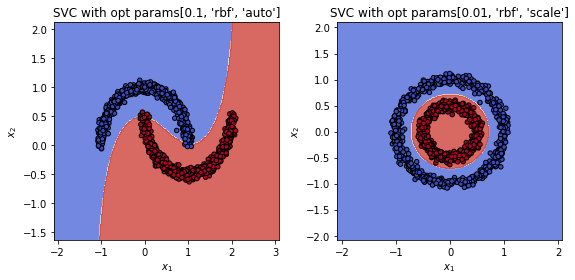

In [550]:
X_test = [X_moons_train, X_circles_train]
y_test = [y_moons_train, y_circles_train]

models = (svm.SVC(kernel=opt_moons_params[1], C=opt_moons_params[0], gamma=opt_moons_params[2]),
          svm.SVC(kernel=opt_circles_params[1], C=opt_circles_params[0], gamma=opt_circles_params[2]))
models = [clf.fit(X_test[i], y_test[i]) for i, clf in zip(range(2), models)]


# title for the plots
titles = ('SVC with opt params' + str(opt_moons_params),
          'SVC with opt params' + str(opt_circles_params))

# Set-up 1x2 grid for plotting.
fig, sub = plt.subplots(1, 2, figsize=(8, 4))

for i, (clf, title) in enumerate(zip(models, titles)):
    draw(X_test[i], y_test[i], clf, title)
    
plt.tight_layout()

In [551]:
acc_moons = models[0].score(X_moons_test, y_moons_test)
acc_circles = models[1].score(X_circles_test, y_circles_test)
print("Moons Accuracy :"+str(acc_moons))
print("Circles Accuracy :"+str(acc_circles))

Moons Accuracy :1.0
Circles Accuracy :1.0
